# Exploring the other DataFrames that contain hypotetical features

## Feature exploring

The aim is to clean the other dataframes to be used for the feature selection

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [44]:
# We'll import the dataframe that results from the datafiles in "raw_df_for_features"
# and at the end we'll export one file with all of the hypothetical features

In [45]:
df = pd.read_csv('Data.csv')

#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m ').dt.strftime('%Y-%m')
#df.loc[:,'date'] = df.loc[:,'date'].dt.strftime('%Y-%m')
df.set_index(['country','date'], inplace=True)

#Converting data into numeric types
for i in df.index:
    for j in df.columns:
        df.loc[i,j] = float(df.loc[i,j])

display(df)

df.info()

df.to_csv('CleanData.csv', index=True)

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                          
AL      2007-01                       NaN                       NaN   
        2007-02                       NaN                       NaN   
        2007-03                       NaN                       NaN   
        2007-04                       NaN                       NaN   
        2007-05                       NaN                       NaN   
...                                   ...                       ...   
XK      2023-10                   243.327                    198.32   
        2023-11                       NaN                       NaN   
        2023-12                       NaN                       NaN   
        2024-01                       NaN                       NaN   
        NaN                           NaN                       NaN   

                 Electricity available (GWh)  \
country date                                   
AL      2007-01                          NaN   
        2007-02                          NaN   
        2007-03                          NaN   
        2007-04                          NaN   
        2007-05                          NaN   
...                                      ...   
XK      2023-10                      513.611   
        2023-11                          NaN   
        2023-12                          NaN   
        2024-01                          NaN   
        NaN                              NaN   

                 Electricity generated from natural gas GWh  \
country date                                                  
AL      2007-01                                         NaN   
        2007-02                                         NaN   
        2007-03                                         NaN   
        2007-04                                         NaN   
        2007-05                                         NaN   
...                                                     ...   
XK      2023-10                                         0.0   
        2023-11                                         NaN   
        2023-12                                         NaN   
        2024-01                                         NaN   
        NaN                                             NaN   

                 Total electricity generated GWh  \
country date                                       
AL      2007-01                              NaN   
        2007-02                              NaN   
        2007-03                              NaN   
        2007-04                              NaN   
        2007-05                              NaN   
...                                          ...   
XK      2023-10                          468.603   
        2023-11                              NaN   
        2023-12                              NaN   
        2024-01                              NaN   
        NaN                                  NaN   

                 Fraction of electricity generated by gas  Gas produced Mm3  \
country date                                                                  
AL      2007-01                                       NaN               NaN   
        2007-02                                       NaN               NaN   
        2007-03                                       NaN               NaN   
        2007-04                                       NaN               NaN   
        2007-05                                       NaN               NaN   
...                                                   ...               ...   
XK      2023-10                                       0.0               NaN   
        2023-11                                       NaN               NaN   
        2023-12                                       NaN               NaN   
        2024-01                                       NaN               NaN   
        NaN            

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8834 entries, ('AL', '2007-01') to ('XK', nan)
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        7081 non-null   float64
 1   Electricity export (GWh)                        7081 non-null   float64
 2   Electricity available (GWh)                     7082 non-null   float64
 3   Electricity generated from natural gas GWh      3135 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3066 non-null   float64
 6   Gas produced Mm3                                3911 non-null   float64
 7   Gas from other sources Mm3                      1488 non-null   float64
 8   Gas consumed Mm3                                4077 non-null   float64
 9   Gas exported Mm3  

### Let's delete some dates/timestamps

In [46]:
df = pd.read_csv('CleanData.csv')
#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m')
df.set_index(['country','date'], inplace=True)

#rows with little non-NaN values
df = df.dropna(thresh=round(len(df.columns)/3))

#rows after february 2020 (start of covid spreading in europe)
#df = df.loc[(slice(None), slice(None, pd.to_datetime("2020-02",format='%Y-%m'))), :]

df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6663 entries, ('AL', Timestamp('2018-01-01 00:00:00')) to ('XK', Timestamp('2023-10-01 00:00:00'))
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        6584 non-null   float64
 1   Electricity export (GWh)                        6584 non-null   float64
 2   Electricity available (GWh)                     6585 non-null   float64
 3   Electricity generated from natural gas GWh      3135 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3066 non-null   float64
 6   Gas produced Mm3                                3909 non-null   float64
 7   Gas from other sources Mm3                      1485 non-null   float64
 8   Gas consumed Mm3                           

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                    97.366                   244.825   
        2018-02-01                    10.377                   379.292   
        2018-03-01                     6.913                   580.513   
        2018-04-01                     6.436                   593.729   
        2018-05-01                    11.847                   432.244   
...                                      ...                       ...   
XK      2023-06-01                   201.925                   196.891   
        2023-07-01                   268.050                   226.059   
        2023-08-01                   293.908                   202.609   
        2023-09-01                   246.256                   202.573   
        2023-10-01                   243.327                   198.320   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                      588.340   
        2018-02-01                      542.046   
        2018-03-01                      564.343   
        2018-04-01                      465.565   
        2018-05-01                      476.886   
...                                         ...   
XK      2023-06-01                      454.795   
        2023-07-01                      520.260   
        2023-08-01                      514.419   
        2023-09-01                      459.781   
        2023-10-01                      513.611   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                          884.286   
        2018-02-01                         1054.965   
        2018-03-01                         1291.465   
        2018-04-01                         1174.183   
        2018-05-01                         1007.731   
...                                             ...   
XK      2023-06-01                          449.761   
        2023-07-01                          478.270   
        2023-08-01                          423.120   
        2023-09-01                          416.098   
        2023-10-01                          468.603   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

### Let's see what are the countries which depend most on gas

In [47]:
df.loc[(slice(None),slice(None)),'Fraction of electricity generated by gas'] > 0.4

pd.options.display.max_seq_items = 1000
display(df.loc[df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:],['Electricity generated from natural gas GWh','Fraction of electricity generated by gas']])
gascountries = df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:].get_level_values('country').unique()
print(gascountries)
pd.options.display.max_seq_items = 100

Electricity generated from natural gas GWh  \
country date                                                     
GE      2022-12-01                                     662.019   
        2023-01-01                                     697.429   
        2023-02-01                                     615.655   
IE      2017-06-01                                    1293.201   
        2017-07-01                                    1477.708   
...                                                        ...   
NL      2020-09-01                                    5732.896   
        2020-11-01                                    5916.833   
        2020-12-01                                    6120.870   
        2021-02-01                                    5860.451   
        2021-06-01                                    4780.527   

                    Fraction of electricity generated by gas  
country date                                                  
GE      2022-12-01                                  0.612479  
        2023-01-01                                  0.649910  
        2023-02-01                                  0.645236  
IE      2017-06-01                                  0.572542  
        2017-07-01                                  0.628362  
...                                                      ...  
NL      2020-09-01                                  0.578006  
        2020-11-01                                  0.582692  
        2020-12-01                                  0.578108  
        2021-02-01                                  0.554794  
        2021-06-01                                  0.556338  

[118 rows x 2 columns]

Index(['GE', 'IE', 'IT', 'LT', 'LV', 'MD', 'MT', 'NL'], dtype='object', name='country')


It seems the countries which most rely on gas to produce electricity are Germany, Ireland, Italy, Latvia, Lithuania, Moldova, Malta and the Netherlands. We will analyze Italy as its dataset seems most complete and interesting (Germany has data only from 2018 on and the Netherlands data are not well correlated, both from the correlation matrix and from the plots)

In [48]:
pd.set_option('display.max_rows', 100)
display(df.loc[(gascountries,slice(None)),'Fraction of electricity generated by gas'])
display(df.loc['IT'])
pd.set_option('display.max_rows', 100)

country  date      
GE       2018-01-01    0.316222
         2018-02-01    0.346337
         2018-03-01    0.205239
         2018-04-01    0.030306
         2018-05-01    0.062851
                         ...   
NL       2023-10-01    0.336563
         2023-11-01    0.339599
         2023-12-01    0.380498
         2024-01-01         NaN
         2024-02-01         NaN
Name: Fraction of electricity generated by gas, Length: 1274, dtype: float64

Electricity import (GWh)  Electricity export (GWh)  \
date                                                             
2008-01-01                    3887.0                     275.0   
2008-02-01                    3759.0                     365.0   
2008-03-01                    3846.0                     473.0   
2008-04-01                    3711.0                     185.0   
2008-05-01                    4043.0                     194.0   
...                              ...                       ...   
2023-10-01                    4987.0                     211.0   
2023-11-01                    4810.0                     266.0   
2023-12-01                    4924.0                     402.0   
2024-01-01                       NaN                       NaN   
2024-02-01                       NaN                       NaN   

            Electricity available (GWh)  \
date                                      
2008-01-01                      29553.0   
2008-02-01                      28257.0   
2008-03-01                      28293.0   
2008-04-01                      26854.0   
2008-05-01                      27233.0   
...                                 ...   
2023-10-01                      25351.0   
2023-11-01                      24829.0   
2023-12-01                      24869.0   
2024-01-01                          NaN   
2024-02-01                          NaN   

            Electricity generated from natural gas GWh  \
date                                                     
2008-01-01                                         NaN   
2008-02-01                                         NaN   
2008-03-01                                         NaN   
2008-04-01                                         NaN   
2008-05-01                                         NaN   
...                                                ...   
2023-10-01                                      9532.0   
2023-11-01                                      8484.0   
2023-12-01                                      9749.0   
2024-01-01                                         NaN   
2024-02-01                                         NaN   

            Total electricity generated GWh  \
date                                          
2008-01-01                              NaN   
2008-02-01                              NaN   
2008-03-01                              NaN   
2008-04-01                              NaN   
2008-05-01                              NaN   
...                                     ...   
2023-10-01                          20770.0   
2023-11-01                          20469.0   
2023-12-01                          20483.0   
2024-01-01                              NaN   
2024-02-01                              NaN   

            Fraction of electricity generated by gas  Gas produced Mm3  \
date                                                                     
2008-01-01                                       NaN               NaN   
2008-02-01                                       NaN               NaN   
2008-03-01                                       NaN               NaN   
2008-04-01                                       NaN               NaN   
2008-05-01                                       NaN               NaN   
...                                              ...               ...   
2023-10-01                                  0.458931             253.0   
2023-11-01                                  0.414480             240.0   
2023-12-01                                  0.475956             240.0   
2024-01-01                                       NaN             250.0   
2024-02-01                                       NaN             237.0   

            Gas from other sources Mm3  Gas consumed Mm3  Gas exported Mm3  \
date                                                                         
2008-01-01                         NaN               NaN               NaN   
2008-02-01                   

The Netherlands, Germany and Italy have the most complete data on this front. Our choice for the analysis will be Italy.

### Italian exploratory data analysis

We will also merge data about which countries italy exports to and imports from, and investigate if this data  matches the initial data we had, about the informations of imports and exports.

Electricity import (GWh)  Electricity export (GWh)  \
date                                                             
2008-10-01                    3094.0                     255.0   
2008-11-01                    3855.0                     221.0   
2008-12-01                    4079.0                     432.0   
2009-01-01                    4026.0                     194.0   
2009-02-01                    4234.0                     140.0   
...                              ...                       ...   
2023-09-01                    3908.0                     248.0   
2023-10-01                    4987.0                     211.0   
2023-11-01                    4810.0                     266.0   
2023-12-01                    4924.0                     402.0   
2024-01-01                       NaN                       NaN   

            Electricity available (GWh)  \
date                                      
2008-10-01                      28288.0   
2008-11-01                      26781.0   
2008-12-01                      26630.0   
2009-01-01                      27374.0   
2009-02-01                      25445.0   
...                                 ...   
2023-09-01                      25773.0   
2023-10-01                      25351.0   
2023-11-01                      24829.0   
2023-12-01                      24869.0   
2024-01-01                          NaN   

            Electricity generated from natural gas GWh  \
date                                                     
2008-10-01                                         NaN   
2008-11-01                                         NaN   
2008-12-01                                         NaN   
2009-01-01                                         NaN   
2009-02-01                                         NaN   
...                                                ...   
2023-09-01                                     10326.0   
2023-10-01                                      9532.0   
2023-11-01                                      8484.0   
2023-12-01                                      9749.0   
2024-01-01                                         NaN   

            Total electricity generated GWh  \
date                                          
2008-10-01                              NaN   
2008-11-01                              NaN   
2008-12-01                              NaN   
2009-01-01                              NaN   
2009-02-01                              NaN   
...                                     ...   
2023-09-01                          22256.0   
2023-10-01                          20770.0   
2023-11-01                          20469.0   
2023-12-01                          20483.0   
2024-01-01                              NaN   

            Fraction of electricity generated by gas  Gas produced Mm3  \
date                                                                     
2008-10-01                                       NaN               NaN   
2008-11-01                                       NaN               NaN   
2008-12-01                                       NaN               NaN   
2009-01-01                                       NaN               NaN   
2009-02-01                                       NaN               NaN   
...                                              ...               ...   
2023-09-01                                  0.463965             246.0   
2023-10-01                                  0.458931             253.0   
2023-11-01                                  0.414480             240.0   
2023-12-01                                  0.475956             240.0   
2024-01-01                                       NaN             250.0   

            Gas from other sources Mm3  Gas consumed Mm3  Gas exported Mm3  \
date                                                                         
2008-10-01                         NaN               NaN               NaN   
2008-11-01                   

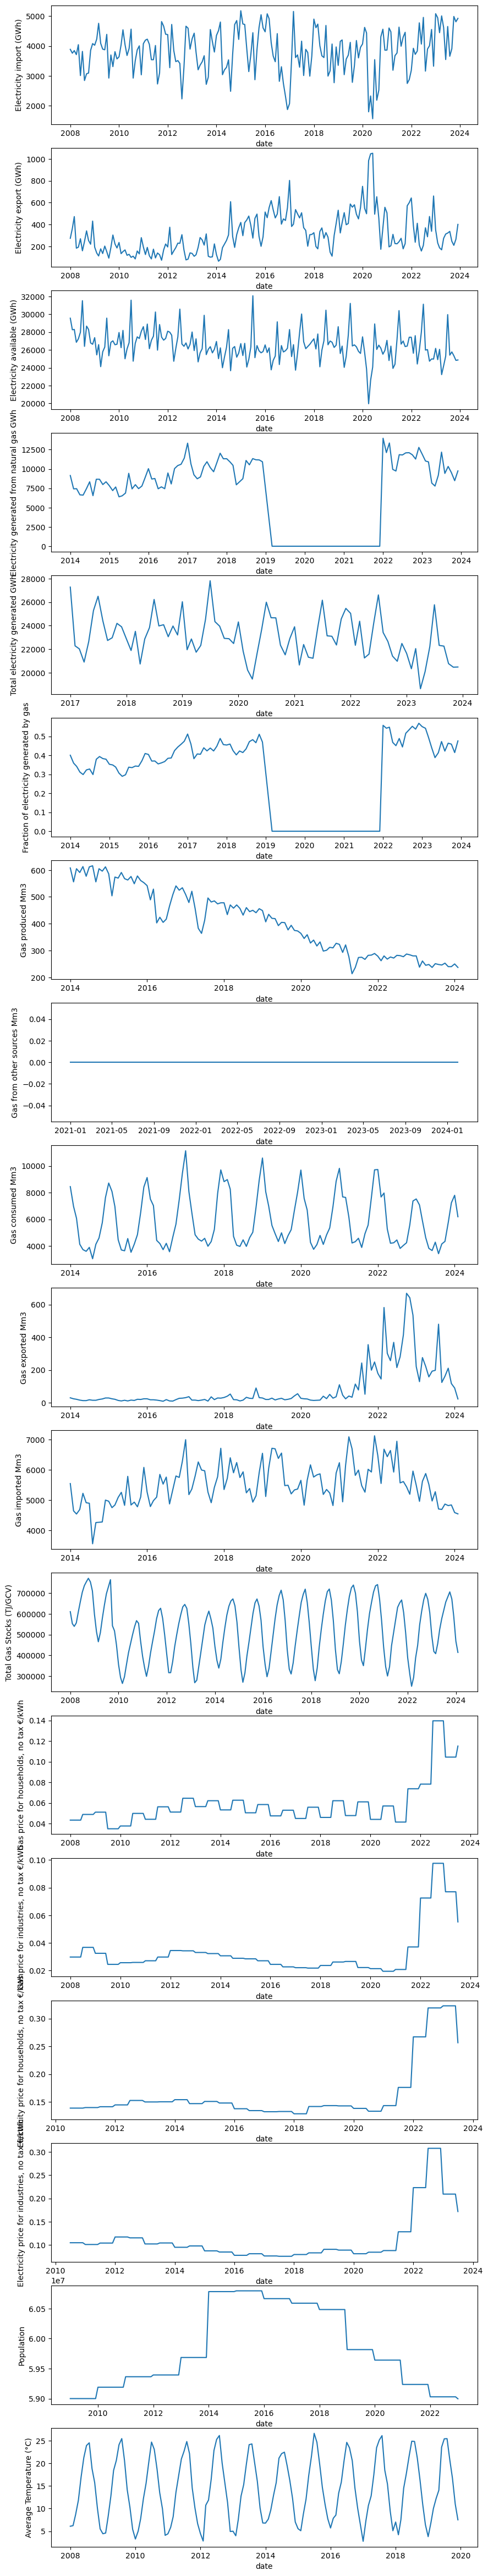

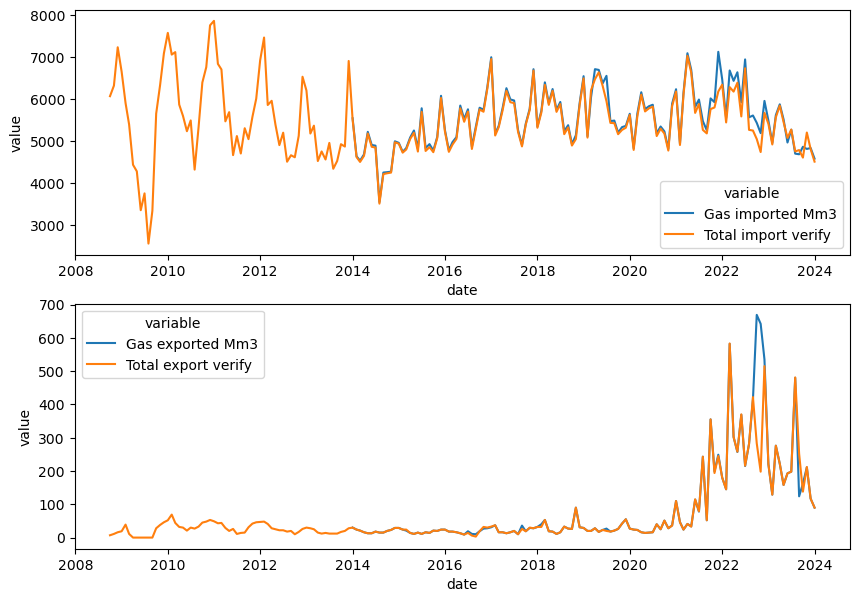

In [49]:
#Creating a datafile for Italy only
dfIT = df.loc['IT']
df_melted = dfIT.melt(id_vars=['Electricity import (GWh)'], value_vars=['Electricity available (GWh)'])

# Plotting everything

fig, axes = plt.subplots(len(df.columns),1,figsize = (10,60))

for i in range(0,len(dfIT.columns)):
    sb.lineplot(data = dfIT[dfIT.columns[i]], ax=axes[i]) 


import auxiliary_functions as af 

df_exp= pd.read_csv('GTF_export_cleaned.csv')

df_exp["date"] = pd.to_datetime(df_exp["Month"], format="mixed") # Re-setting the month as datetime object
df_exp.set_index("date", inplace=True, drop=True)                     # Re-setting the month as index
df_exp.drop(columns=["Month"], inplace=True)
df_exp.index = df_exp.index.strftime('%Y-%m')
df_exp.index.name = 'date'


ex_flowsit = af.exit_flows('Italy',df_exp)
ex_flowsit['Total export verify']= ex_flowsit.sum(axis=1)
in_flowsit = af.entry_flows('Italy',df_exp)
in_flowsit['Total import verify']= in_flowsit.sum(axis=1)

flowsit = pd.merge(ex_flowsit, in_flowsit, left_index=True, right_index=True)
flowsit = flowsit.set_index(pd.to_datetime(flowsit.index,format = '%Y-%m'))

dfIT = pd.merge(dfIT, flowsit, left_index=True, right_index=True)

dfIT = dfIT.reset_index()

fig, axess = plt.subplots(2,1,figsize = (10,7))
sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfIT[['date','Gas imported Mm3', 'Total import verify']], ['date']),ax = axess[0])
sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfIT[['date','Gas exported Mm3', 'Total export verify']], ['date']),ax = axess[1])
dfIT = dfIT.set_index('date')

display(dfIT)

We will consider the data compatible. After 2020 we will make a forecast, so most of the discrepancies will be deleted. We will consider the data about years eurostat did not have as reliable.

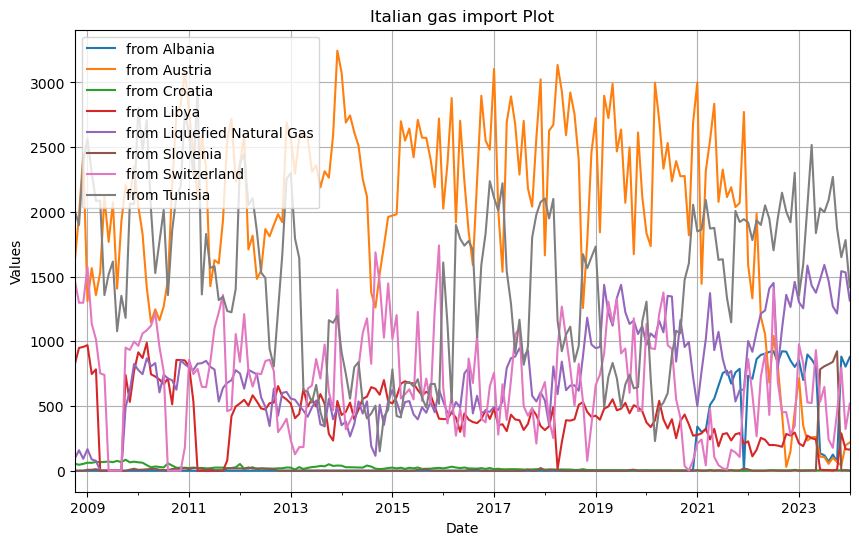

In [50]:
dfIT.loc[dfIT.index < ('2014-01-01'),'Gas imported Mm3'] = dfIT.loc[dfIT.index < ('2014-01-01'), 'Total import verify']
dfIT.loc[dfIT.index < ('2014-01-01'),'Gas exported Mm3'] = dfIT.loc[dfIT.index < ('2014-01-01'), 'Total export verify']
dfIT = dfIT.drop(columns=['Total import verify','Total export verify'])

columns_to_plot = [col for col in flowsit.columns if 'from' in col]
flowsit[columns_to_plot].plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Italian gas import Plot')
plt.legend(loc='upper left')  # Adjust legend location if needed
plt.grid(True)  
plt.show()

Let's investigate if the data available only from 2014 (Some gas flows) or 2017 (Electricity production) on are influential to regress gas imports. Let's start by plotting the gas data against gas consumption.


Correlation matrix for all periods:


Electricity import (GWh)  \
Electricity import (GWh)                                        1.000000   
Electricity export (GWh)                                       -0.418072   
Electricity available (GWh)                                     0.195926   
Electricity generated from natural gas GWh                      0.070528   
Total electricity generated GWh                                -0.295181   
Fraction of electricity generated by gas                        0.113586   
Gas produced Mm3                                               -0.051625   
Gas from other sources Mm3                                           NaN   
Gas consumed Mm3                                                0.153488   
Gas exported Mm3                                                0.116775   
Gas imported Mm3                                               -0.044392   
Total Gas Stocks Mm3                                           -0.202518   
Gas price for households, no tax €/kWh                          0.136967   
Gas price for industries, no tax €/kWh                          0.180835   
Electricity price for households, no tax €/kWh                  0.201462   
Electricity price for industries, no tax €/kWh                  0.152185   
Population                                                     -0.003395   
Average Temperature (°C)                                       -0.336192   
to Albania                                                      0.161945   
to Austria                                                      0.077818   
to Slovenia                                                     0.207144   
to Switzerland                                                  0.036615   
from Albania                                                    0.201162   
from Austria                                                   -0.255657   
from Croatia                                                   -0.005244   
from Libya                                                     -0.051032   
from Liquefied Natural Gas                                      0.078056   
from Slovenia                                                   0.075819   
from Switzerland                                               -0.016216   
from Tunisia                                                    0.130183   

                                                Electricity export (GWh)  \
Electricity import (GWh)                                       -0.418072   
Electricity export (GWh)                                        1.000000   
Electricity available (GWh)                                    -0.262244   
Electricity generated from natural gas GWh                     -0.185859   
Total electricity generated GWh                                 0.162437   
Fraction of electricity generated by gas                       -0.224364   
Gas produced Mm3                                               -0.043389   
Gas from other sources Mm3                                           NaN   
Gas consumed Mm3                                                0.087870   
Gas exported Mm3                                                0.046102   
Gas imported Mm3                                                0.137824   
Total Gas Stocks Mm3                                            0.062859   
Gas price for households, no tax €/kWh                          0.023745   
Gas price for industries, no tax €/kWh                         -0.080582   
Electricity price for households, no tax €/kWh                 -0.051848   
Electricity price for industries, no tax €/kWh                 -0.099406   
Population                                                      0.274532   
Average Temperature (°C)                                        0.055826   
to Albania                                                      0.030078   
to Austria                                                      0.041903   
to Slovenia                                                    -0.333202   
to Switzerland     

Correlation matrix excluding years after 2019:


Electricity import (GWh)  \
Electricity import (GWh)                                        1.000000   
Electricity export (GWh)                                       -0.271169   
Electricity available (GWh)                                     0.176570   
Electricity generated from natural gas GWh                     -0.017653   
Total electricity generated GWh                                -0.278587   
Fraction of electricity generated by gas                       -0.012236   
Gas produced Mm3                                                0.112846   
Gas from other sources Mm3                                           NaN   
Gas consumed Mm3                                                0.197301   
Gas exported Mm3                                                0.088748   
Gas imported Mm3                                                0.013628   
Total Gas Stocks Mm3                                           -0.262500   
Gas price for households, no tax €/kWh                         -0.060308   
Gas price for industries, no tax €/kWh                          0.090790   
Electricity price for households, no tax €/kWh                  0.079758   
Electricity price for industries, no tax €/kWh                 -0.000508   
Population                                                      0.022043   
Average Temperature (°C)                                       -0.336192   
to Albania                                                           NaN   
to Austria                                                     -0.176197   
to Slovenia                                                     0.077513   
to Switzerland                                                  0.202849   
from Albania                                                         NaN   
from Austria                                                   -0.072760   
from Croatia                                                    0.038824   
from Libya                                                      0.030394   
from Liquefied Natural Gas                                     -0.019732   
from Slovenia                                                   0.076575   
from Switzerland                                                0.061466   
from Tunisia                                                    0.039620   

                                                Electricity export (GWh)  \
Electricity import (GWh)                                       -0.271169   
Electricity export (GWh)                                        1.000000   
Electricity available (GWh)                                    -0.146792   
Electricity generated from natural gas GWh                     -0.176691   
Total electricity generated GWh                                 0.338239   
Fraction of electricity generated by gas                       -0.206658   
Gas produced Mm3                                               -0.341168   
Gas from other sources Mm3                                           NaN   
Gas consumed Mm3                                                0.008884   
Gas exported Mm3                                               -0.101700   
Gas imported Mm3                                                0.121872   
Total Gas Stocks Mm3                                            0.062063   
Gas price for households, no tax €/kWh                          0.040660   
Gas price for industries, no tax €/kWh                         -0.502471   
Electricity price for households, no tax €/kWh                 -0.330703   
Electricity price for industries, no tax €/kWh                 -0.618049   
Population                                                      0.545258   
Average Temperature (°C)                                        0.055826   
to Albania                                                           NaN   
to Austria                                                      0.343443   
to Slovenia                                                    -0.472874   
to Switzerland     

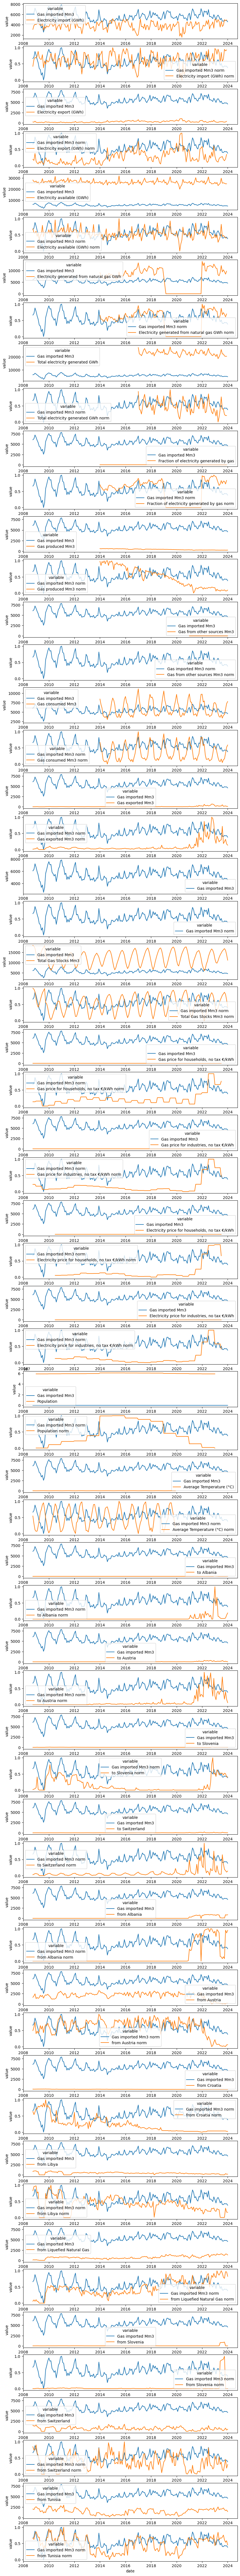

In [51]:
#Plotting normalized data
dfIT.rename(columns = {'Total Gas Stocks (TJ/GCV)':'Total Gas Stocks Mm3'}, inplace = True) 
dfIT['Total Gas Stocks Mm3'] = dfIT['Total Gas Stocks Mm3']/52.5 #MJ/kg Assumed HHV from theengineeringtoolbox = MLN kg
dfIT['Total Gas Stocks Mm3'] = dfIT['Total Gas Stocks Mm3']/0.8 #kg/m3 density of natural gas from theengineeringtoolbox = MLN m3

dfITn = dfIT.copy(deep=True)

for column in dfITn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfITn.loc[:,column] = (dfITn.loc[:,column] - dfITn.loc[:,column].min())/(dfITn.loc[:,column].max() - dfITn.loc[:,column].min())

#Plotting all data, normalized and not

dfITn = dfITn.add_suffix(' norm')
dfITn = dfITn.reset_index()
dfIT = dfIT.reset_index()
dfPlot = pd.concat([dfIT,dfITn])

fig, axes = plt.subplots(len(dfPlot.columns)-1,1,figsize = (10,120))

j = 0
k = 1
for i in range(0,int((len(dfPlot.columns)-1)/2)):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlot[['date','Gas imported Mm3',dfPlot.columns[k]]], ['date']), ax=axes[j])
    j = j + 1
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlot[['date','Gas imported Mm3 norm',dfPlot.columns[int(k+(len(dfPlot.columns)-1)/2)]]], ['date']), ax=axes[j])
    j = j + 1
    k = k + 1

dfITn = dfITn.set_index('date')
dfIT = dfIT.set_index('date')

print('Correlation matrix for all periods:')
display(dfIT.corr())
print('Correlation matrix excluding years after 2019:')
display(dfIT.loc[dfIT.index < '2020-01-01'].corr())

It seems that the amount of electricity generated by gas (and as such the fraction of electricity generated by gas) is not a good indicator of how much gas Italy imports, while the gas consumed is. We can see that the electricity import goes similarly with gas imports. Electricity exports and electricity available to market (that is to say: electricity surplus) are not that well correlated to the metric of our interest. The electricity generated shows some peaks in correspondance to the gas imports, but most of it looks delayed of some months. The comparison between gas imports and gas consumption shows that when Italy consumes lots of gas, it also imports a lot of gas (peaks in the graph) if it is winter, as it can also be noted with a relevant negative correlation value between the average temperature in the country and and the gas conumned. If it's summer, Italy still relies on gas for electricity generation but it doesn't import as much gas. Data also shows that Italy relies on stocking gas in the winter to use it later in the summer. On the other hand, the amount of gas produced and the amount of gas exported are so little to not have any impact on the rest of the metrics. The data about population does not seem to look well correlated to anything else (its high correlation with gas produced is considered fortuituos, same goes for the fraction of elextricity consumed by gas), this could be due to it being annually sampled.
It is very interesting to see that gas/electricity prices for industries/households are highly correlated with the complete data, this goes to confirm the fact that gas is an important factor in electricity generation for Italy, already visible with the high correlation between those values singularly with the fraction of electricity generated from gas. The former is not the case before 2020: only the electricty and gas prices for industries seem to be higly correlated, while the others exhibit positive, but not strong, correlation. A notable correlation value is that between Total electricity generated and electricity exported, which is of 0.9.

Other correlations regarding the import/export values to certain neighbour countries are being noticed, as a higher gas export to Switzerland when the temperature gets colder, probably due to the high demand in cold winters. The correlation that relates the most with the goal of our project is about gas prices, that are clearly tied with the imports from certain countries, mainly due to some historical events happened through the last years.
Our data suggests that principally when gas prices get higher, both for households and industrial uses, imports from Austria tend to decrease as imports from other countries as Albania increase. This trend can be justified clearly with the conflict happening between Russia and Ukraine that led to a strong increase in gas prices in all Europe, we can suppose that most of the russian gas was arriving from Austria and so imports were decreased as prices and availability has changed. Looking at the graph comparing gas imports from all the countries throughout the years we can confirm it, as in 2022 Austria fastly stopped being the main gas exporter to Italy, and other markets increased to satisfy the demand, as Tunisia and Albania.
Another observation migth come out from liquified natural gas import, as it seems to be imported principally when the gas production is low and viceversa, we can so underline how the use of regasification plants present in the territory are fundamental to balance gas price and import mix.


Sadly, the prices at which Italy imports electricity and gas were not found accessible by our research. All the trustworthy sources required explicit requests by sending personal documents and formal requests, which was not an option for the time purposes of this project.

Let's explore prices correlation if all data was sampled biannually:

In [52]:
display(dfPlot)

date  Electricity import (GWh)  Electricity export (GWh)  \
0   2008-10-01                    3094.0                     255.0   
1   2008-11-01                    3855.0                     221.0   
2   2008-12-01                    4079.0                     432.0   
3   2009-01-01                    4026.0                     194.0   
4   2009-02-01                    4234.0                     140.0   
..         ...                       ...                       ...   
179 2023-09-01                       NaN                       NaN   
180 2023-10-01                       NaN                       NaN   
181 2023-11-01                       NaN                       NaN   
182 2023-12-01                       NaN                       NaN   
183 2024-01-01                       NaN                       NaN   

     Electricity available (GWh)  Electricity generated from natural gas GWh  \
0                        28288.0                                         NaN   
1                        26781.0                                         NaN   
2                        26630.0                                         NaN   
3                        27374.0                                         NaN   
4                        25445.0                                         NaN   
..                           ...                                         ...   
179                          NaN                                         NaN   
180                          NaN                                         NaN   
181                          NaN                                         NaN   
182                          NaN                                         NaN   
183                          NaN                                         NaN   

     Total electricity generated GWh  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
..                               ...   
179                              NaN   
180                              NaN   
181                              NaN   
182                              NaN   
183                              NaN   

     Fraction of electricity generated by gas  Gas produced Mm3  \
0                                         NaN               NaN   
1                                         NaN               NaN   
2                                         NaN               NaN   
3                                         NaN               NaN   
4                                         NaN               NaN   
..                                        ...               ...   
179                                       NaN               NaN   
180                                       NaN               NaN   
181                                       NaN               NaN   
182                                       NaN               NaN   
183                                       NaN               NaN   

     Gas from other sources Mm3  Gas consumed Mm3  ...  to Slovenia norm  \
0                           NaN               NaN  ...               NaN   
1                           NaN               NaN  ...               NaN   
2                           NaN               NaN  ...               NaN   
3                           NaN               NaN  ...               NaN   
4                           NaN               NaN  ...               NaN   
..                          ...               ...  ...               ...   
179                         NaN               NaN  ...          0.463768   
180                         NaN               NaN  ...          0.521739   
181                         NaN               NaN  ...          0.507246   
182                         NaN               NaN  ...          0.405797   
183                         NaN               NaN  ...          0.405797   

     to S

In [53]:
dfITnb = dfITn.resample('6M').sum()
dfITb = dfIT.resample('6M').sum()

dfPlotb = pd.concat([dfITb,dfITnb])

Correlation matrix for all periods:


date  \
date                                                1.000000   
Electricity import (GWh)                            0.079941   
Electricity export (GWh)                            0.514334   
Electricity available (GWh)                        -0.014775   
Electricity generated from natural gas GWh          0.476298   
Total electricity generated GWh                     0.806547   
Fraction of electricity generated by gas            0.484862   
Gas produced Mm3                                    0.497376   
Gas from other sources Mm3                               NaN   
Gas consumed Mm3                                    0.726485   
Gas exported Mm3                                    0.600292   
Gas imported Mm3                                    0.134291   
Total Gas Stocks Mm3                                0.200270   
Gas price for households, no tax €/kWh              0.359461   
Gas price for industries, no tax €/kWh              0.289806   
Electricity price for households, no tax €/kWh      0.548294   
Electricity price for industries, no tax €/kWh      0.493029   
Population                                         -0.180790   
Average Temperature (°C)                           -0.480325   
to Albania                                          0.454945   
to Austria                                          0.630152   
to Slovenia                                        -0.110116   
to Switzerland                                      0.621896   
from Albania                                        0.636671   
from Austria                                       -0.235967   
from Croatia                                       -0.783450   
from Libya                                         -0.452814   
from Liquefied Natural Gas                          0.740206   
from Slovenia                                       0.265330   
from Switzerland                                   -0.226526   
from Tunisia                                       -0.007202   
Electricity import (GWh) norm                       0.087179   
Electricity export (GWh) norm                       0.524764   
Electricity available (GWh) norm                   -0.174739   
Electricity generated from natural gas GWh norm     0.476298   
Total electricity generated GWh norm                0.728456   
Fraction of electricity generated by gas norm       0.484862   
Gas produced Mm3 norm                               0.203220   
Gas from other sources Mm3 norm                          NaN   
Gas consumed Mm3 norm                               0.580074   
Gas exported Mm3 norm                               0.600292   
Gas imported Mm3 norm                               0.131972   
Total Gas Stocks Mm3 norm                           0.202133   
Gas price for households, no tax €/kWh norm         0.491994   
Gas price for industries, no tax €/kWh norm         0.350747   
Electricity price for households, no tax €/kWh ...  0.514347   
Electricity price for industries, no tax €/kWh ...  0.429062   
Population norm                                     0.018422   
Average Temperature (°C) norm                      -0.427096   
to Albania norm                                     0.454945   
to Austria norm                                     0.630152   
to Slovenia norm                                   -0.110116   
to Switzerland norm                                 0.621896   
from Albania norm                                   0.636671   
from Austria norm                                  -0.237488   
from Croatia norm                                  -0.783450   
from Libya norm                                    -0.452814   
from Liquefied Natural Gas norm                     0.740206   
from Slovenia norm                                  0.265330   
from Switzerland norm                              -0.226526   
from Tunisia norm                                  -0.011806   

                                                    Electricity import (GWh)  \
date   

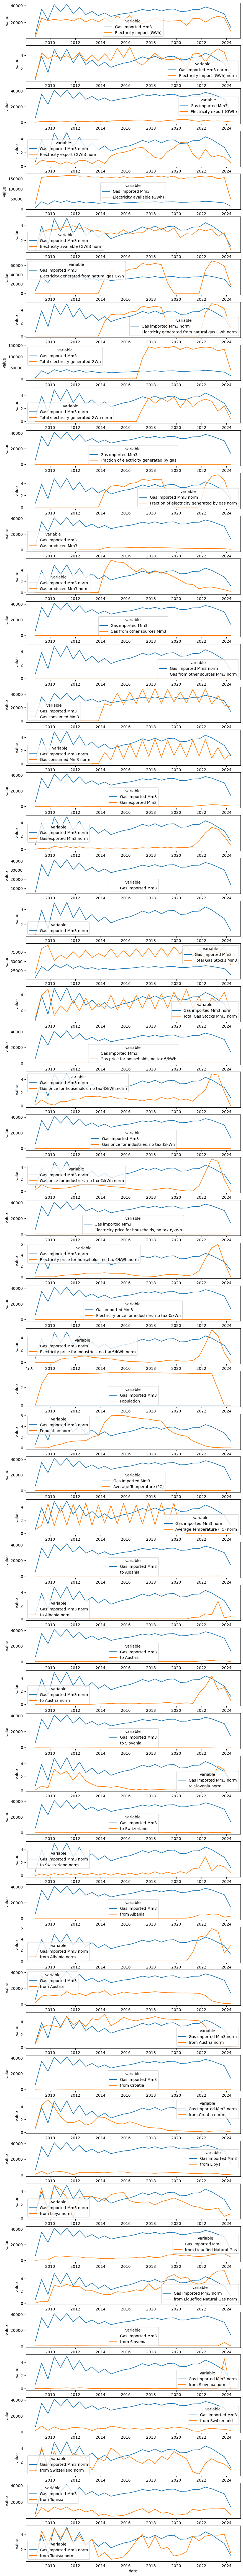

In [56]:
dfITn = dfITn.reset_index()
dfIT = dfIT.reset_index()
dfPlotb = pd.concat([dfIT,dfITn])
dfPlotb = dfPlotb.set_index('date')
dfPlotb = dfPlotb.resample('6M').sum()
dfPlotb = dfPlotb.reset_index()
fig, axes = plt.subplots(len(dfPlotb.columns)-1,1,figsize = (10,120))

dfITn = dfITn.set_index('date')
dfIT = dfIT.set_index('date')

j = 0
k = 1
for i in range(0,int((len(dfPlotb.columns)-1)/2)):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlotb[['date','Gas imported Mm3',dfPlotb.columns[k]]], ['date']), ax=axes[j])
    j = j + 1
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlotb[['date','Gas imported Mm3 norm',dfPlotb.columns[int(k+(len(dfPlotb.columns)-1)/2)]]], ['date']), ax=axes[j])
    j = j + 1
    k = k + 1

print('Correlation matrix for all periods:')
display(dfPlotb.corr())

Electricity/Gas prices for Industry/Households don't correlate well to gas imports. The same can be said for population. What is apparent, though, is that gas price for households follows the rule of supply and demand (when gas imports are high gas prices drops and vice versa). It remains relevant the correlation among prices.

Let's perform a time series analysis for some features, for the period up to december 2019.

Analyzing feature: Gas imported Mm3


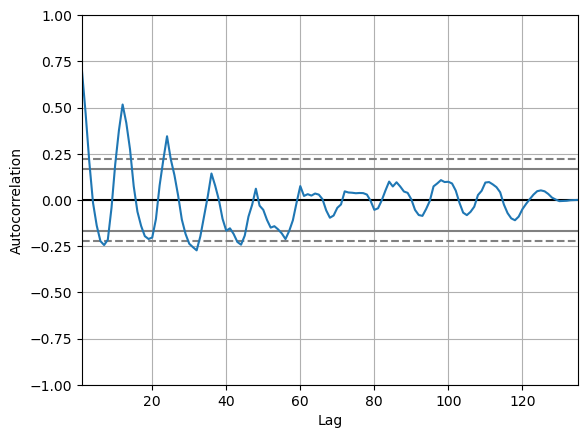

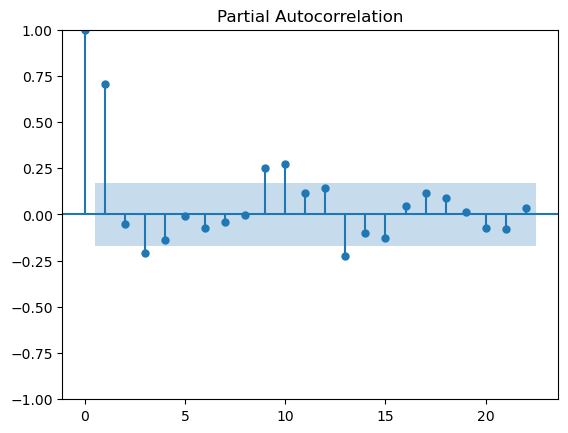

Analyzing feature: Gas price for households, no tax €/kWh


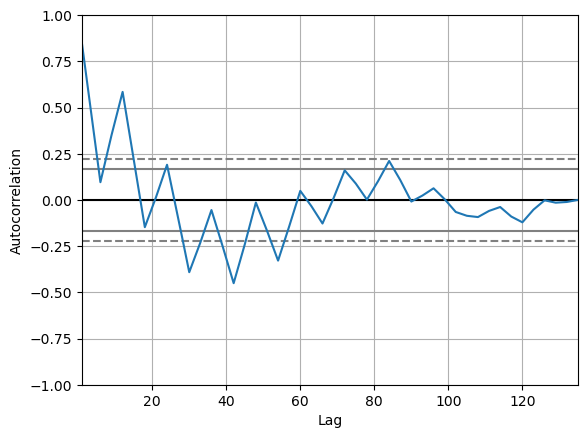

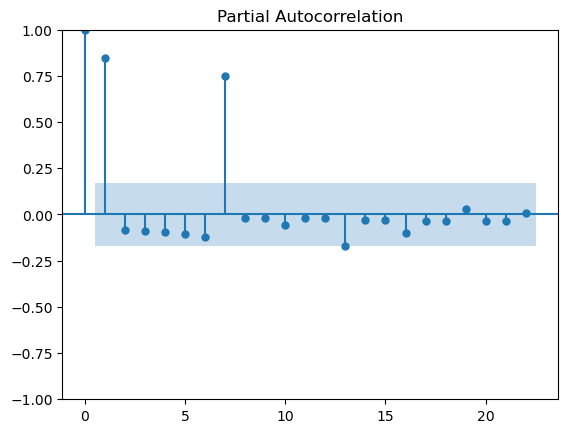

Analyzing feature: Electricity export (GWh)


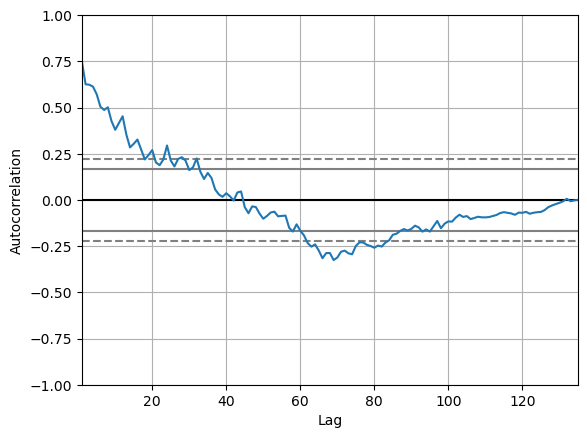

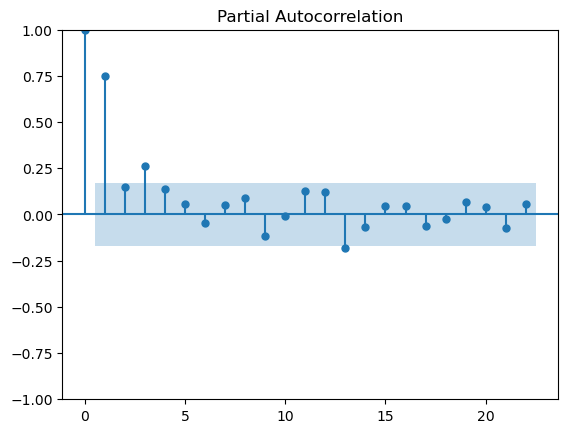

Analyzing feature: Electricity generated from natural gas GWh


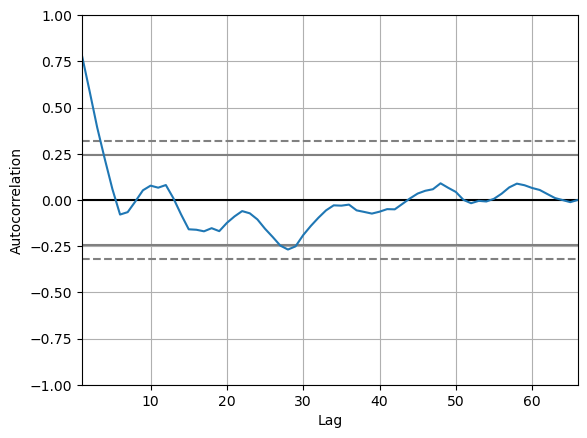

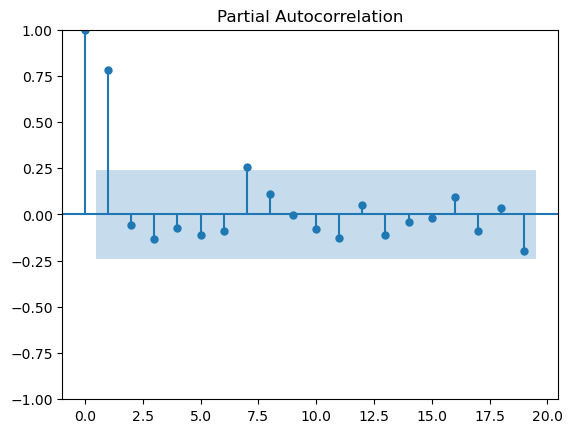

Analyzing feature: Fraction of electricity generated by gas


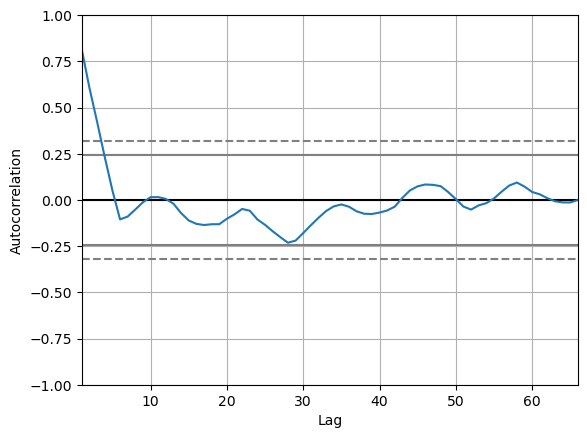

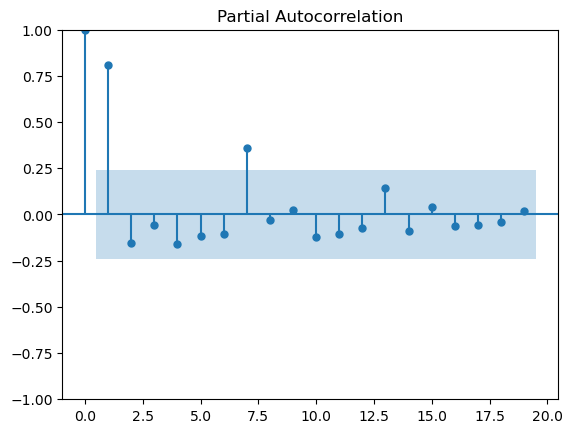

Analyzing feature: Total electricity generated GWh


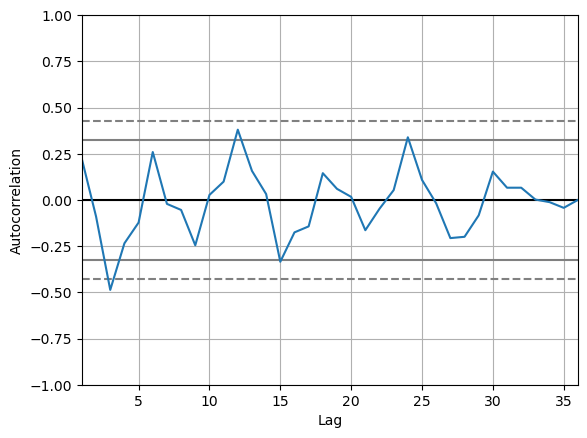

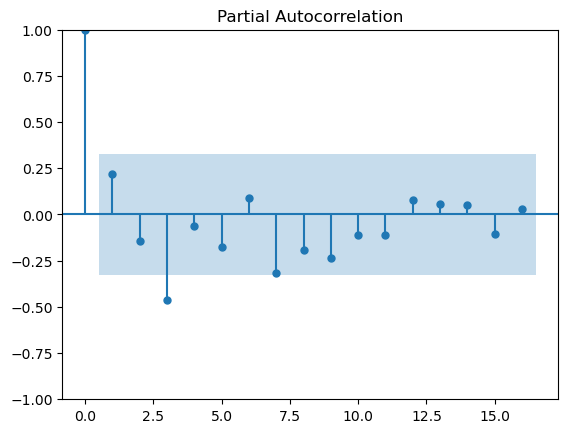

Analyzing feature: Gas consumed Mm3


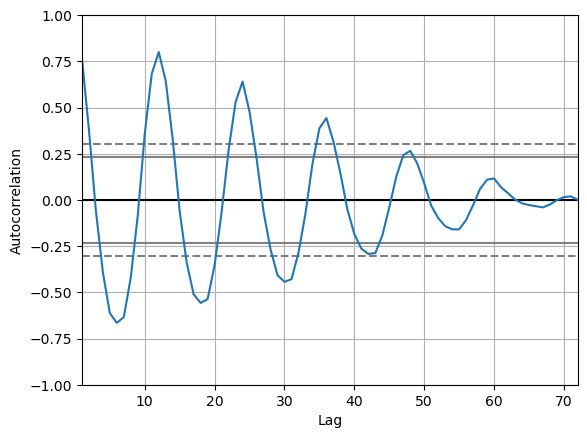

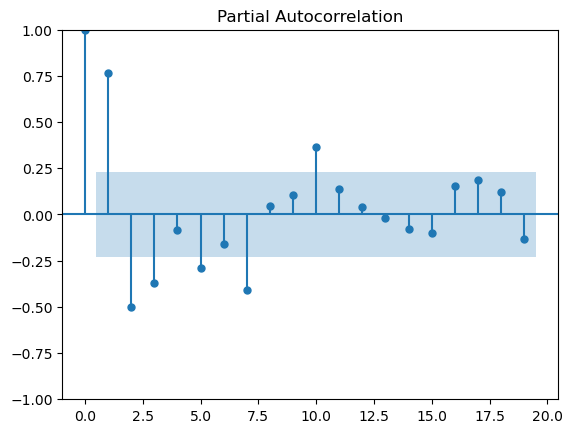

Analyzing feature: Total Gas Stocks Mm3


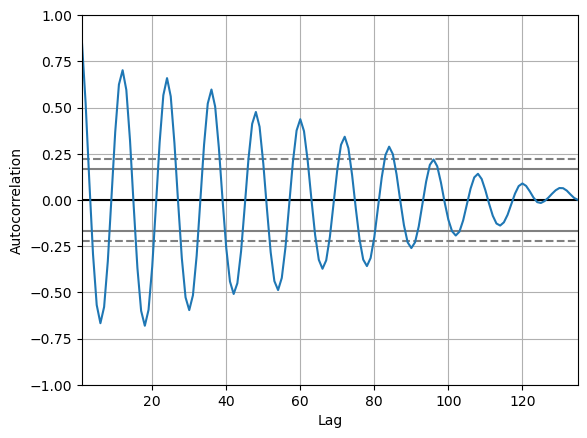

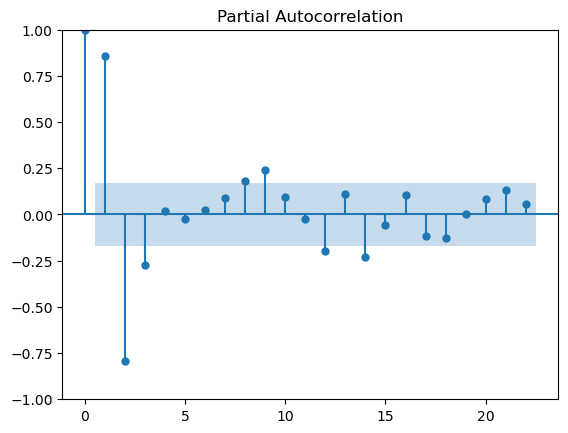

Analyzing feature: Average Temperature (°C)


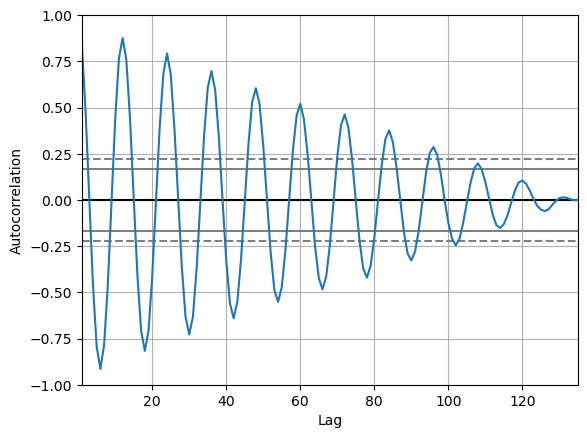

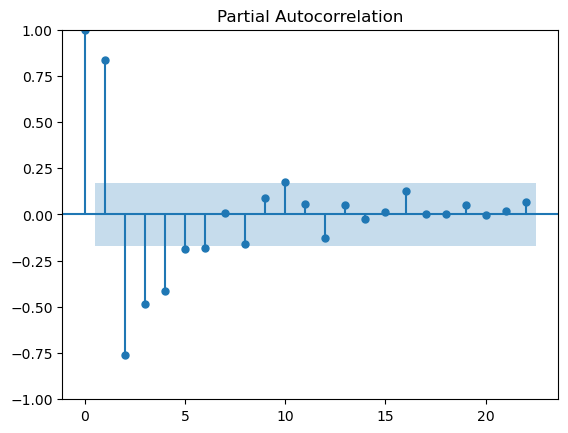

In [57]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Suspected periodical features

periodics = ['Gas imported Mm3','Gas price for households, no tax €/kWh', 'Electricity export (GWh)','Electricity generated from natural gas GWh', 'Fraction of electricity generated by gas','Total electricity generated GWh','Gas consumed Mm3','Total Gas Stocks Mm3','Average Temperature (°C)']

for i in periodics:
    plotter = dfIT.loc[(dfIT.loc[:,i].notna()) & (dfIT.index < '2020-01-01'),i]
    print('Analyzing feature: ' + plotter.name)
    '''
    #detailed tsa for a specified period
    res = sm.tsa.seasonal_decompose(plotter,period=4,model='additive')
    resplot = res.plot()
    '''

    #autocorrelation 
    autocorrelation_plot(plotter)
    plt.show()
    
    #Autocorrelation
    '''
    plot_acf(plotter,lags = 140)
    plt.show()
    '''
    #Partial autocorrelation
    
    plot_pacf(plotter)
    plt.show()
    

It looks like only the consumed gas, the total gas stocked and the temperature have a good degree of autocorrelation (0.74 or more in a certain lag). Moreover, all 3 seem to have a maximum value after 12 months and a minimum value (with high negative autocorrelation) after 6 months. Therefore, we will autoregress the consumed gas from 2014 to 2008 to complete the dataset.

In [58]:
dfIT.columns

Index(['Electricity import (GWh)', 'Electricity export (GWh)',
       'Electricity available (GWh)',
       'Electricity generated from natural gas GWh',
       'Total electricity generated GWh',
       'Fraction of electricity generated by gas', 'Gas produced Mm3',
       'Gas from other sources Mm3', 'Gas consumed Mm3', 'Gas exported Mm3',
       'Gas imported Mm3', 'Total Gas Stocks Mm3',
       'Gas price for households, no tax €/kWh',
       'Gas price for industries, no tax €/kWh',
       'Electricity price for households, no tax €/kWh',
       'Electricity price for industries, no tax €/kWh', 'Population',
       'Average Temperature (°C)', 'to Albania', 'to Austria', 'to Slovenia',
       'to Switzerland', 'from Albania', 'from Austria', 'from Croatia',
       'from Libya', 'from Liquefied Natural Gas', 'from Slovenia',
       'from Switzerland', 'from Tunisia'],
      dtype='object')

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  103
Model:             Restr. AutoReg(60)   Log Likelihood                -324.027
Method:               Conditional MLE   S.D. of innovations            453.310
Date:                Thu, 09 May 2024   AIC                            666.054
Time:                        16:35:09   BIC                            681.905
Sample:                            60   HQIC                           671.900
                                  103                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.3531    279.121      1.825      0.068     -37.713    1056.419
y.L1           0.1041      0.093      1.115      0.265      -0.079       0.287
y.L2          -0.0417      0.063     -0.657      0.5

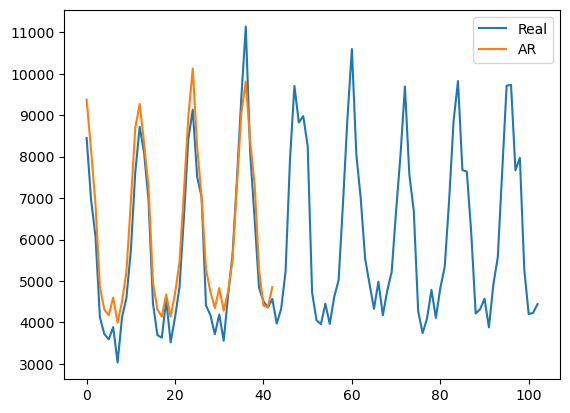

In [59]:
from statsmodels.tsa.ar_model import AutoReg
#Testing on itself
Y=dfIT.values[:,8]

split_point = round(len(Y)*0.9) #Splitting 75-25
train, test = Y[0:split_point], Y[split_point:]

# train autoregression
model = AutoReg(train, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

print(model_fit.summary())
plt.plot(train[~np.isnan(train)],label='Real')
plt.plot(model_fit.fittedvalues,label='AR')
plt.legend()

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  121
Model:             Restr. AutoReg(60)   Log Likelihood                -473.142
Method:               Conditional MLE   S.D. of innovations            565.370
Date:                Thu, 09 May 2024   AIC                            964.283
Time:                        16:35:09   BIC                            983.281
Sample:                            60   HQIC                           971.729
                                  121                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1428    302.095     -0.053      0.957    -608.239     575.953
y.L1           0.2986      0.096      3.116      0.002       0.111       0.486
y.L2          -0.1459      0.067     -2.192      0.0

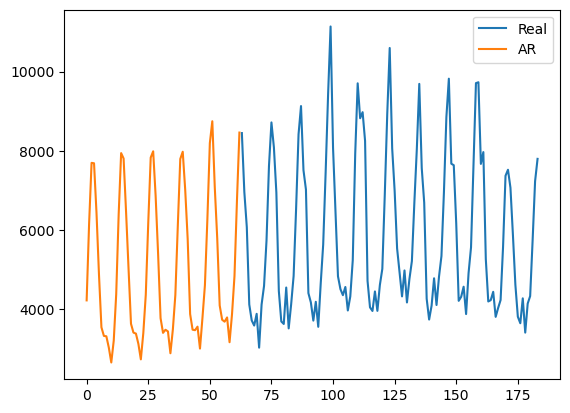

In [61]:
Y=np.flip(dfIT.values[:,8])

# train autoregression
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

forecast = np.flip(model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y)-1))

Y=np.flip(Y)

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

Good enough.

<Axes: xlabel='date', ylabel='Gas consumed Mm3'>

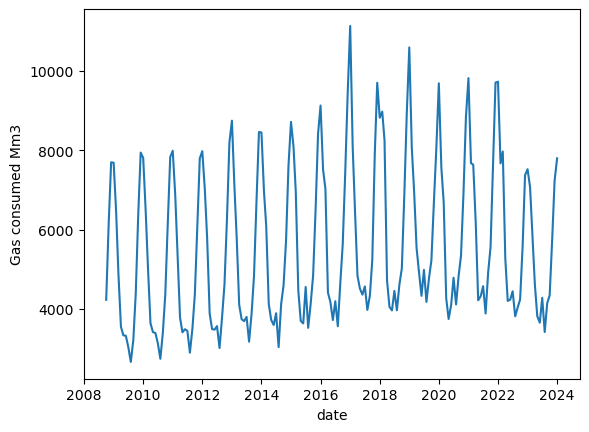

In [62]:
dfIT.loc[dfIT.index<'2014-01-01','Gas consumed Mm3'] = forecast
sb.lineplot(data=dfIT.loc[:,'Gas consumed Mm3'])

We will now delete some data. Later, we will generate more features, mainly by extracting values, delaying data and generally modifying it.

In [63]:
dfIT = dfIT.drop(['Electricity export (GWh)','Electricity available (GWh)','Gas from other sources Mm3','Population'],axis = 1)
dfIT = dfIT.drop(['Gas price for households, no tax €/kWh','Gas price for industries, no tax €/kWh','Electricity price for households, no tax €/kWh'],axis=1)
dfIT = dfIT.drop(['Electricity price for industries, no tax €/kWh'],axis=1)

dfIT.to_csv('Data_03.csv', index=True)